In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance['sex'].replace({'female': 0, 'male': 1},inplace=True)

In [7]:
insurance['smoker'].replace({'no': 0, 'yes': 1},inplace=True)

In [8]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
insurance['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3},inplace=True)

In [10]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


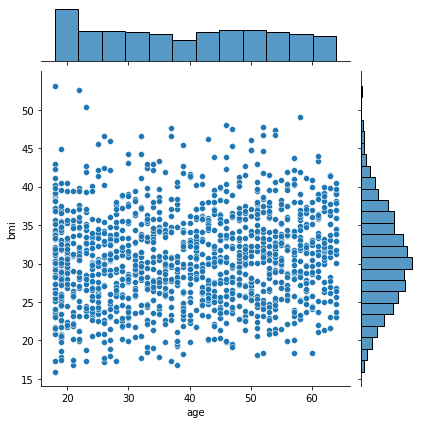

In [11]:
sns.jointplot(insurance['age'], insurance['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


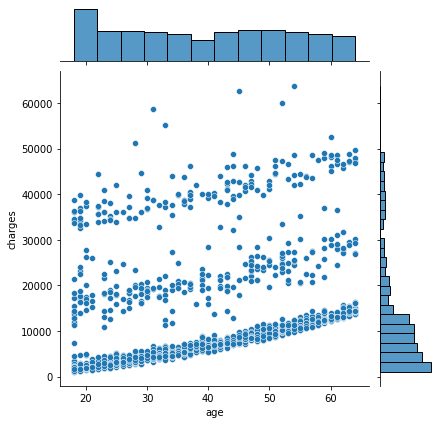

In [12]:
sns.jointplot(insurance['age'], insurance['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


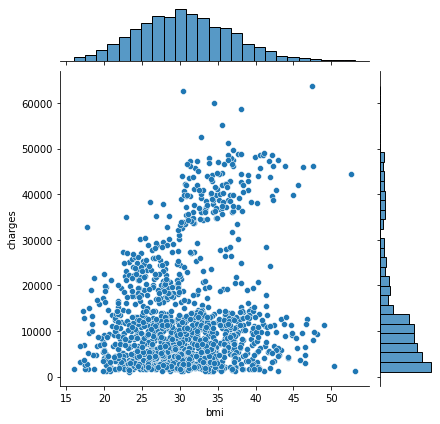

In [13]:
sns.jointplot(insurance['bmi'], insurance['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


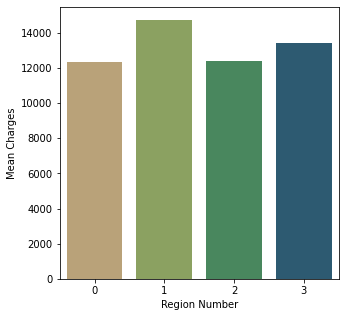

In [14]:
#visualizing countries with the most number of people vaccinated
x = insurance.groupby("region")["charges"].mean().sort_values(ascending= False)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.index,x.values, palette="gist_earth_r")
ax.set_xlabel("Region Number")
ax.set_ylabel("Mean Charges")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


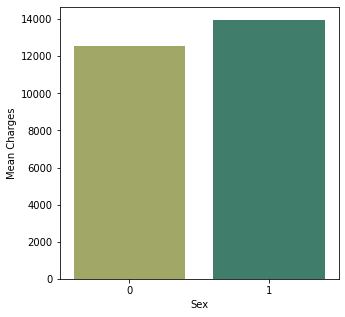

In [15]:
#visualizing countries with the most number of people vaccinated
x = insurance.groupby("sex")["charges"].mean().sort_values(ascending= True)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.index,x.values, palette="gist_earth_r")
ax.set_xlabel("Sex")
ax.set_ylabel("Mean Charges")
plt.show()

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text major ticklabel objects>)

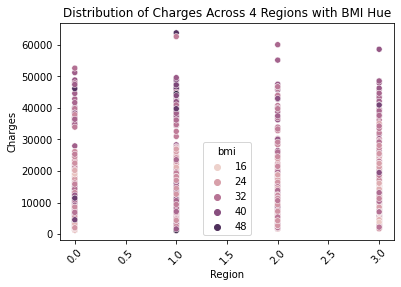

In [16]:
myplot = sns.scatterplot(data=insurance, x="region", y="charges",hue ='bmi')
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Distribution of Charges Across 4 Regions with BMI Hue")
plt.xticks(rotation=45)

(array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 <a list of 10 Text major ticklabel objects>)

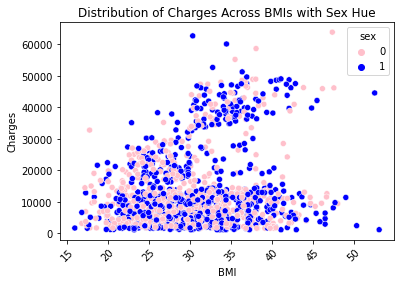

In [17]:
myplot = sns.scatterplot(data=insurance, x="bmi", y="charges", hue='sex', palette= ['pink', 'blue'])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of Charges Across BMIs with Sex Hue")
plt.xticks(rotation=45)

In [18]:
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [19]:
Y = insurance['charges']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, shuffle = True)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lr.coef_)

[2.60311734e+02 2.29359488e+01 3.31278271e+02 4.97989182e+02
 2.34122073e+04 3.93987048e+02]


In [24]:
yhat = lr.predict(x_test)

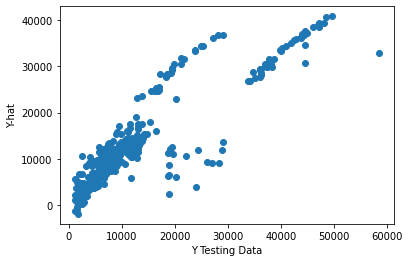

In [25]:
plt.scatter(y_test,yhat)
plt.xlabel('Y Testing Data')
plt.ylabel('Y-hat')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


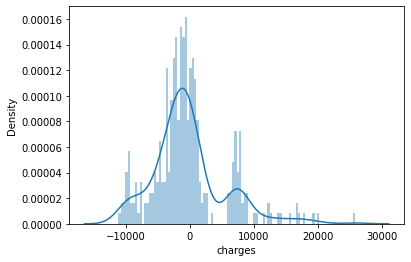

In [26]:
sns.distplot((y_test-yhat),bins=100)

In [27]:
lr.intercept_

-12962.879840236186

In [28]:
print(metrics.mean_absolute_error(y_test,yhat))

4000.811399378619
